# COVID-19 Pandas + Seaborn


In this project you will apply your Python Pandas and Seaborn skills to obtain useful insights into the live COVID-19 data. The [dataset](https://github.com/open-covid-19/data) is a processed version of the main [COVID-19 data repository](https://github.com/CSSEGISandData/COVID-19) for the 2019 Novel Coronavirus Visual Dashboard that is operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

The dataset is updated on a public GitHub repository, so we can donwload the most recent verion as follows:

In [0]:
import pandas as pd
data_covid19 = pd.read_csv("https://open-covid-19.github.io/data/data.csv",parse_dates=["Date"],index_col="Date")

*How many rows and how many columns does this dataset have?*

In [2]:
###Start code here
data_covid19.shape
###End code here

(37961, 10)

*Print the first 20 rows in the dataset.*

In [3]:
###Start code here
data_covid19.head(20)
###End code here

,Key,CountryCode,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population
Date,,,,,,,,,,
2019-12-30,AE,AE,United Arab Emirates,NaN,NaN,0.0,0.0,23.424076,53.847818,9.770529e+06
2019-12-30,AF,AF,Afghanistan,NaN,NaN,0.0,0.0,33.939110,67.709953,3.804175e+07
2019-12-30,AM,AM,Armenia,NaN,NaN,0.0,0.0,40.069099,45.038189,2.957731e+06
2019-12-30,AT,AT,Austria,NaN,NaN,0.0,0.0,47.516231,14.550072,8.955102e+06
2019-12-30,AU,AU,Australia,NaN,NaN,0.0,0.0,-25.274398,133.775136,2.520320e+07
2019-12-30,AZ,AZ,Azerbaijan,NaN,NaN,0.0,0.0,40.143105,47.576927,1.004772e+07
2019-12-30,BE,BE,Belgium,NaN,NaN,0.0,0.0,50.503887,4.469936,1.153933e+07
2019-12-30,BH,BH,Bahrain,NaN,NaN,0.0,0.0,25.930414,50.637772,1.641172e+06
2019-12-30,BR,BR,Brazil,NaN,NaN,0.0,0.0,-14.235004,-51.925280,2.110495e+08


The columns of
[data_covid19](https://open-covid-19.github.io/data/data.csv) are:

| Name | Description | Example |
| ---- | ----------- | ------- |
| **Date**\* | ISO 8601 date (YYYY-MM-DD) of the datapoint | 2020-03-21 |
| **Key** | `CountryCode` if country-level data, otherwise `${CountryCode}_${RegionCode}` | CN_HB |
| **CountryCode** | ISO 3166-1 code of the country | CN |
| **CountryName** | American English name of the country, subject to change | China |
| **RegionCode** | (Optional) ISO 3166-2 or NUTS 2 code of the region | HB |
| **RegionName** | (Optional) American English name of the region, subject to change | Hubei |
| **Confirmed**\*\* | Total number of cases confirmed after positive test | 67800 |
| **Deaths**\*\* | Total number of deaths from a positive COVID-19 case | 3139 |
| **Latitude** | Floating point representing the geographic coordinate | 30.9756 |
| **Longitude** | Floating point representing the geographic coordinate | 112.2707 |
| **Population** | Total count of humans living in the region | 1.153933e+07 |

\*Date used is **reporting** date, which generally lags a day from the actual
date and is subject to timezone adjustments. Whenever possible, dates
consistent with the ECDC daily reports are used.

\*\*Missing values will be represented as nulls, whereas zeroes are used when
a true value of zero is reported. For example, US states where deaths are not
being reported have null values.

For countries where both country-level and region-level data is available, the
entry which has a null value for the `RegionCode` and `RegionName` columns
indicates country-level aggregation. Please note that, sometimes, the
country-level data and the region-level data come from different sources so
adding up all region-level values may not equal exactly to the reported
country-level value. See the [data loading tutorial][7] for more information.

The `CountryName` and `RegionName` values are subject to change. You may use
them for labels in your application, but you should not assume that they will
remain the same in future updates. Instead, use `CountryCode` and `RegionCode`
to perform joins with other data sources or for filtering within your
application.

For this analysis we will look at only a few countries. We can use the `Key` column to select these countries:

In [0]:
countries = ["FR","BE","SE","CH","AU","NL","CN","JP","GB","ES","IT","US"]

data_covid19 = data_covid19[data_covid19["Key"].isin(countries)]

*Print the last 10 rows in the dataset where `Key` is BE*.

In [5]:
###Start code here
data_covid19[data_covid19["Key"]=="BE"].tail(10)
###End code here

,Key,CountryCode,CountryName,RegionCode,RegionName,Confirmed,Deaths,Latitude,Longitude,Population
Date,,,,,,,,,,
2020-04-11,BE,BE,Belgium,NaN,NaN,28018.0,3346.0,50.503887,4.469936,11539328.0
2020-04-12,BE,BE,Belgium,NaN,NaN,29647.0,3600.0,50.503887,4.469936,11539328.0
2020-04-13,BE,BE,Belgium,NaN,NaN,30589.0,3903.0,50.503887,4.469936,11539328.0
2020-04-14,BE,BE,Belgium,NaN,NaN,31119.0,4157.0,50.503887,4.469936,11539328.0
2020-04-15,BE,BE,Belgium,NaN,NaN,33573.0,4440.0,50.503887,4.469936,11539328.0
2020-04-16,BE,BE,Belgium,NaN,NaN,34809.0,4857.0,50.503887,4.469936,11539328.0
2020-04-17,BE,BE,Belgium,NaN,NaN,36138.0,5163.0,50.503887,4.469936,11539328.0
2020-04-18,BE,BE,Belgium,NaN,NaN,37183.0,5453.0,50.503887,4.469936,11539328.0
2020-04-19,BE,BE,Belgium,NaN,NaN,38496.0,5683.0,50.503887,4.469936,11539328.0


*Use the Pandas DataFrame `.describe()` method to print statistics about the confirmed cases for Belgium.*

In [6]:
###Start code here
data_covid19[data_covid19["Key"]=="BE"]["Confirmed"].describe()
###End code here

count      113.000000
mean      5583.787611
std      10810.759509
min          0.000000
25%          0.000000
50%          1.000000
75%       3743.000000
max      39983.000000
Name: Confirmed, dtype: float64

Each row in the dataset represents a day and contains the number of confirmed cases in a region (country) for that day. You will plot the number of confirmed cases for each country up until today. To do so you will first create a new DataFrame that contains the data to plot. 

In Pandas the `.groupby` method can group rows by the values in a certain column "A" such that the values in another column "B" can be aggegated. 

*Use these methods to print the total number confirmed cases for each country by assigning the correct columns to variables "A" and "B":*

In [7]:
###Start code here
A = "Key"
B = "Confirmed"
###End code here

total_confirmed = data_covid19.groupby(A)[B].sum()
print(total_confirmed)

Key
AU      160856.0
BE      630968.0
CH      620005.0
CN     5894152.0
ES     4051524.0
FR     2193000.0
GB     1673695.0
IT     4368881.0
JP      156599.0
NL      573412.0
SE      239246.0
US    11248401.0
Name: Confirmed, dtype: float64


To plot the result of the aggregagtion we need to transform the result into a DataFrame as follows:

In [8]:
total_confirmed = total_confirmed.reset_index(name = "Confirmed")
print(total_confirmed)

   Key   Confirmed
0   AU    160856.0
1   BE    630968.0
2   CH    620005.0
3   CN   5894152.0
4   ES   4051524.0
5   FR   2193000.0
6   GB   1673695.0
7   IT   4368881.0
8   JP    156599.0
9   NL    573412.0
10  SE    239246.0
11  US  11248401.0


*Sort the countries in `total_confirmed` by confirmed cases in descending order.*

In [9]:
###Start code here
total_confirmed = total_confirmed.sort_values("Confirmed",ascending=False)
###End code here

print(total_confirmed)

   Key   Confirmed
11  US  11248401.0
3   CN   5894152.0
7   IT   4368881.0
4   ES   4051524.0
5   FR   2193000.0
6   GB   1673695.0
1   BE    630968.0
2   CH    620005.0
9   NL    573412.0
10  SE    239246.0
0   AU    160856.0
8   JP    156599.0


We are now ready to make a nice looking barplot using the Seaborn module.

*Assign the correct data to the x and y-axis to plot this barplot:*

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


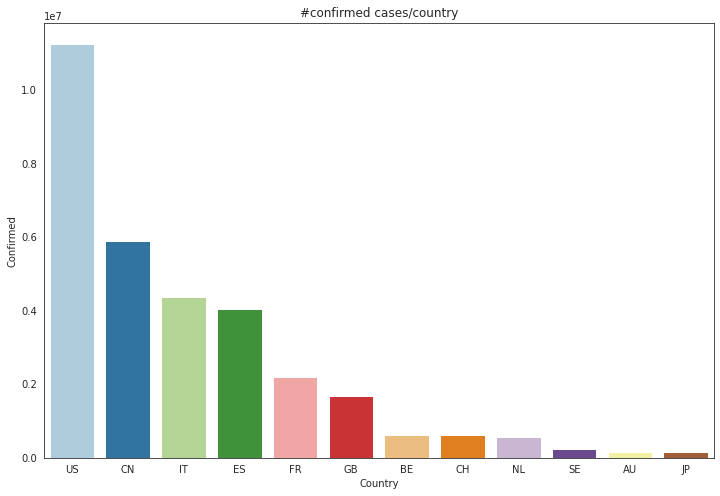

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

###Start code here
x = total_confirmed["Key"]
y = total_confirmed["Confirmed"]
###End code here

plt.figure(figsize=(12,8))
plt.title("#confirmed cases/country")
sns.barplot(x=x,y=y,palette="Paired")
plt.xlabel("Country")
plt.show()

The `Confirmed` column in the `data_covid19` dataset contains the number of confirmed cases for each day. We will add a new column `Confirmed_total` to the dataset that contains the number of confirmed cases up until that day:

In [0]:
data_covid19["Confirmed_total"] = data_covid19.groupby('Key')['Confirmed'].transform(pd.Series.cumsum)

*Use the `.lineplot` method in Seaborn to plot, for each country (on the sample plot), the total number of confirmed cases (x-axis) against the confirmed cases for each day (y-axis):*

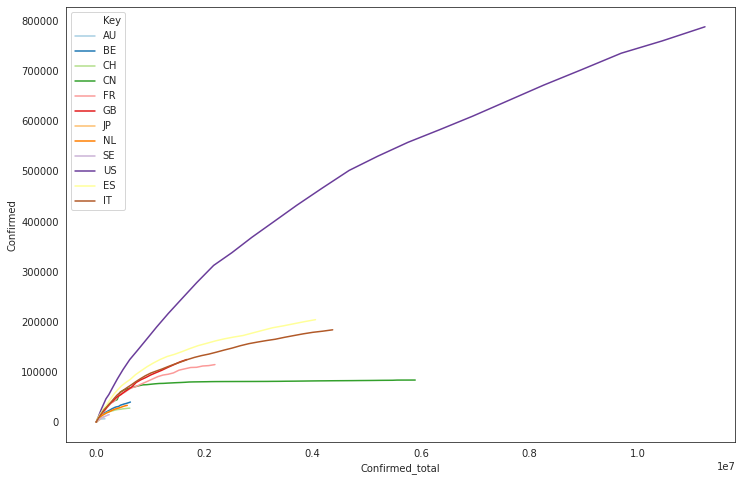

In [12]:
plt.figure(figsize=(12,8))

###Start code here
sns.lineplot(x="Confirmed_total",y="Confirmed",hue="Key",data=data_covid19,palette="Paired")
###End code here

plt.show()

*Add a new column to `data_covid19` called  `Deaths_total` that contains the number of deaths up unitl that day:*

In [0]:
###Start code here
data_covid19["Deaths_total"] = data_covid19.groupby('Key')['Deaths'].transform(pd.Series.cumsum)
###End code here

*Use the `.lineplot` method to plot these two new columns with a line for each country:*

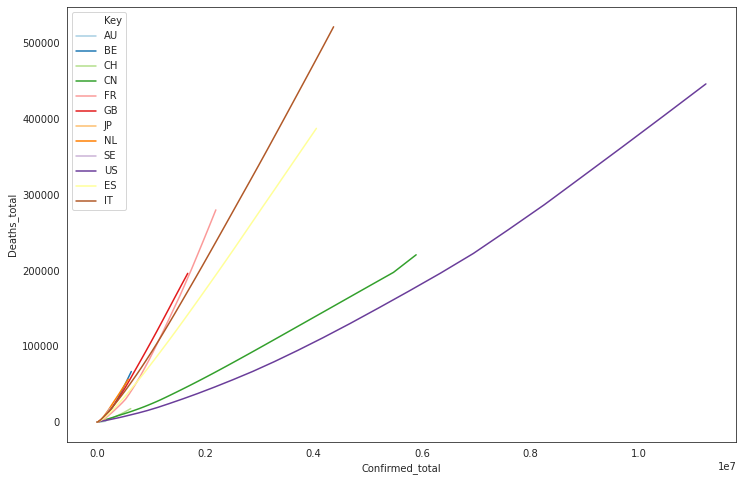

In [14]:
plt.figure(figsize=(12,8))

###Start code here
sns.lineplot(x="Confirmed_total",y="Deaths_total",hue="Key",data=data_covid19,palette="Paired")
###End code here

plt.show()

*Create one more interesting plot from this dataset:*

In [0]:
###Start code here

###End code here